(7351, 1)
8
(328, 9) (328, 1) (1, 327)
[[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
  6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5
  5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6
  6 6 6 6 6 6 6 6 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 6 6 6 6 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2]]


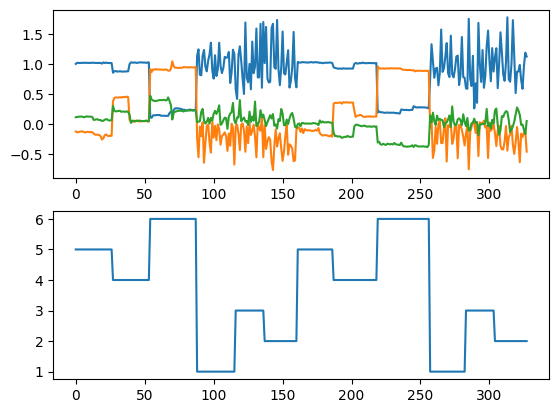

In [115]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/jenniferyu1/Documents/CPD/UCI_HAR_Dataset/train/y_train.txt', sep='\s+').values
print(df.shape)
prev = 0
for i in range(8, 20):
    print(i)
    with open(f'/Users/jenniferyu1/Documents/CPD/TiVaCPD/TiVaCPD/data/HAR/HAR_X_{i}.pkl', 'rb') as handle:
        a = pickle.load(handle)
    with open(f'/Users/jenniferyu1/Documents/CPD/TiVaCPD/TiVaCPD/data/HAR/HAR_y_{i}.pkl', 'rb') as handle:
        b = pickle.load(handle)
    length = a.shape[0]
    print(a.shape, b.shape, df[prev:prev+length-1,:].T.shape)
    print(df[prev:prev+length-1,:].T)
    prev += length-1
    fig, ax = plt.subplots(nrows=2, ncols=1)
    ax[0].plot(a[:, 0:3])
    ax[1].plot(b)
    break
    
   


# with open('/Users/jenniferyu1/Documents/CPD/TiVaCPD/TiVaCPD/data/HAR/HAR_y_0.pkl', 'rb') as handle:
#     b = pickle.load(handle)

In [110]:
a

array([[ 1.012817e+00, -1.232167e-01,  1.029341e-01, ...,  3.019122e-02,
         6.601362e-02,  2.285864e-02],
       [ 1.018851e+00, -1.239760e-01,  9.792958e-02, ...,  1.711106e-02,
         6.122797e-03,  1.226815e-02],
       [ 1.023127e+00, -1.200157e-01,  9.111667e-02, ...,  2.618877e-02,
        -2.383410e-04,  2.158897e-03],
       ...,
       [ 5.127361e-01, -2.546354e-01, -3.260685e-02, ..., -9.345836e-03,
        -2.258731e-01,  3.132447e-01],
       [ 9.420381e-01, -1.289831e-01,  1.707828e-01, ..., -3.981940e-01,
        -5.926758e-01, -2.739136e-01],
       [ 1.920519e+00, -3.509984e-01, -5.019320e-01, ...,  2.544271e-01,
         1.271928e+00, -3.717129e-01]])

In [69]:
a.shape

(347, 9)

In [70]:
b.shape

(328, 1)

# Begin occupancy data preprocessing

In [71]:
import pandas as pd
train = pd.read_csv('/Users/jenniferyu1/Documents/CPD/occupancy_data/datatraining.csv', index_col='index')
test = pd.read_csv('/Users/jenniferyu1/Documents/CPD/occupancy_data/datatest.csv', index_col='index')
test2 = pd.read_csv('/Users/jenniferyu1/Documents/CPD/occupancy_data/datatest2.csv', index_col='index')

In [72]:
indice = [0]
end = False
for i in range(len(train) - 1):
    if (i - indice[-1]) % 300  == 0 and i != 0:
        end = True
    if end == True:
        if train['Occupancy'].iloc[i] != train['Occupancy'].iloc[i+1]:
            indice.append(i)
            end = False
indice[-1] = len(train)

In [73]:
file_i = 0
for end_i in range(1, len(indice)):
    print(indice[end_i-1], indice[end_i])
    X = train[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']].iloc[indice[end_i-1]:indice[end_i]+1].to_numpy()
    y = train[['Occupancy']].iloc[indice[end_i-1]:indice[end_i]+1].to_numpy()
    with open(f'/Users/jenniferyu1/Documents/CPD/TiVaCPD/TiVaCPD/data/occupancy/occupancy_X_{file_i}.pkl','wb') as f:
        pickle.dump(X, f)
    with open(f'/Users/jenniferyu1/Documents/CPD/TiVaCPD/TiVaCPD/data/occupancy/occupancy_y_{file_i}.pkl','wb') as f:
        pickle.dump(y, f)
    file_i += 1

0 826
826 1132
1132 1453
1453 2269
2269 2582
2582 2895
2895 6653
6653 7213
7213 8143


In [74]:
indice = [0]
end = False
for i in range(len(test) - 1):
    if (i - indice[-1]) % 300  == 0 and i != 0:
        end = True
    if end == True:
        if test['Occupancy'].iloc[i] != test['Occupancy'].iloc[i+1]:
            indice.append(i)
            end = False
indice[-1] = len(test)

for end_i in range(1, len(indice)):
    X = test[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']].iloc[indice[end_i-1]:indice[end_i]+1].to_numpy()
    y = test[['Occupancy']].iloc[indice[end_i-1]:indice[end_i]+1].to_numpy()
    with open(f'/Users/jenniferyu1/Documents/CPD/TiVaCPD/TiVaCPD/data/occupancy/occupancy_X_{file_i}.pkl','wb') as f:
        pickle.dump(X, f)
    with open(f'/Users/jenniferyu1/Documents/CPD/TiVaCPD/TiVaCPD/data/occupancy/occupancy_y_{file_i}.pkl','wb') as f:
        pickle.dump(y, f)
    file_i += 1

In [75]:
indice = [0]
end = False
for i in range(len(test2) - 1):
    if (i - indice[-1]) % 300  == 0 and i != 0:
        end = True
    if end == True:
        if test2['Occupancy'].iloc[i] != test2['Occupancy'].iloc[i+1]:
            indice.append(i)
            end = False
indice[-1] = len(test)

for end_i in range(1, len(indice)):
    X = test2[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']].iloc[indice[end_i-1]:indice[end_i]+1].to_numpy()
    y = test2[['Occupancy']].iloc[indice[end_i-1]:indice[end_i]+1].to_numpy()
    with open(f'/Users/jenniferyu1/Documents/CPD/TiVaCPD/TiVaCPD/data/occupancy/occupancy_X_{file_i}.pkl','wb') as f:
        pickle.dump(X, f)
    with open(f'/Users/jenniferyu1/Documents/CPD/TiVaCPD/TiVaCPD/data/occupancy/occupancy_y_{file_i}.pkl','wb') as f:
        pickle.dump(y, f)
    file_i += 1

In [9]:
test[]

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
index,,,,,,,
140,2015-02-02 14:19,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40,24.330000,25.700000,817.000000,1125.800000,0.004841,1


In [10]:
test2

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
index,,,,,,,
1,2015-02-11 14:48,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...
9748,2015-02-18 9:15,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9749,2015-02-18 9:16,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9750,2015-02-18 9:16,20.8900,27.745000,423.500000,1521.500000,0.004237,1


In [78]:
for i in range(21):
    with open(f'/Users/jenniferyu1/Documents/CPD/TiVaCPD/TiVaCPD/data/occupancy/occupancy_X_{i}.pkl', 'rb') as handle:
        a = pickle.load(handle)
    with open(f'/Users/jenniferyu1/Documents/CPD/TiVaCPD/TiVaCPD/data/occupancy/occupancy_y_{i}.pkl', 'rb') as handle:
        b = pickle.load(handle)
    print(a.shape, b.shape)

(827, 5) (827, 1)
(307, 5) (307, 1)
(322, 5) (322, 1)
(817, 5) (817, 1)
(314, 5) (314, 1)
(314, 5) (314, 1)
(3759, 5) (3759, 1)
(561, 5) (561, 1)
(930, 5) (930, 1)
(1037, 5) (1037, 1)
(335, 5) (335, 1)
(304, 5) (304, 1)
(992, 5) (992, 1)
(1063, 5) (1063, 1)
(306, 5) (306, 1)
(1162, 5) (1162, 1)
(513, 5) (513, 1)
(3795, 5) (3795, 1)
(563, 5) (563, 1)
(875, 5) (875, 1)
(568, 5) (568, 1)
